In [1]:
import math

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from xgboost import plot_importance

from hnmchallenge.constant import *
from hnmchallenge.data_reader import DataReader
from hnmchallenge.dataset import Dataset
from hnmchallenge.evaluation.python_evaluation import map_at_k, recall_at_k
from hnmchallenge.feature_manager import FeatureManager
from hnmchallenge.filtered_dataset import FilterdDataset
from hnmchallenge.models.ease.ease import EASE
from hnmchallenge.models.itemknn.itemknn import ItemKNN
from hnmchallenge.models.sgmc.sgmc import SGMC
from hnmchallenge.models.top_pop import TopPop
from hnmchallenge.stratified_dataset import StratifiedDataset

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [2]:
dataset = StratifiedDataset()
dr = DataReader()

In [34]:
base_load_path = dr.get_preprocessed_data_path() / "xgb_models"

In [39]:
VERSION = 0
DATASET = f"cutf_100_TimePop_alpha_0.9_{VERSION}.feather"
MODEL_NAME = f"xgb_{DATASET}.json"

In [40]:
model = xgb.XGBRanker()
model.load_model(base_load_path/MODEL_NAME)

In [41]:
from xgboost import plot_importance

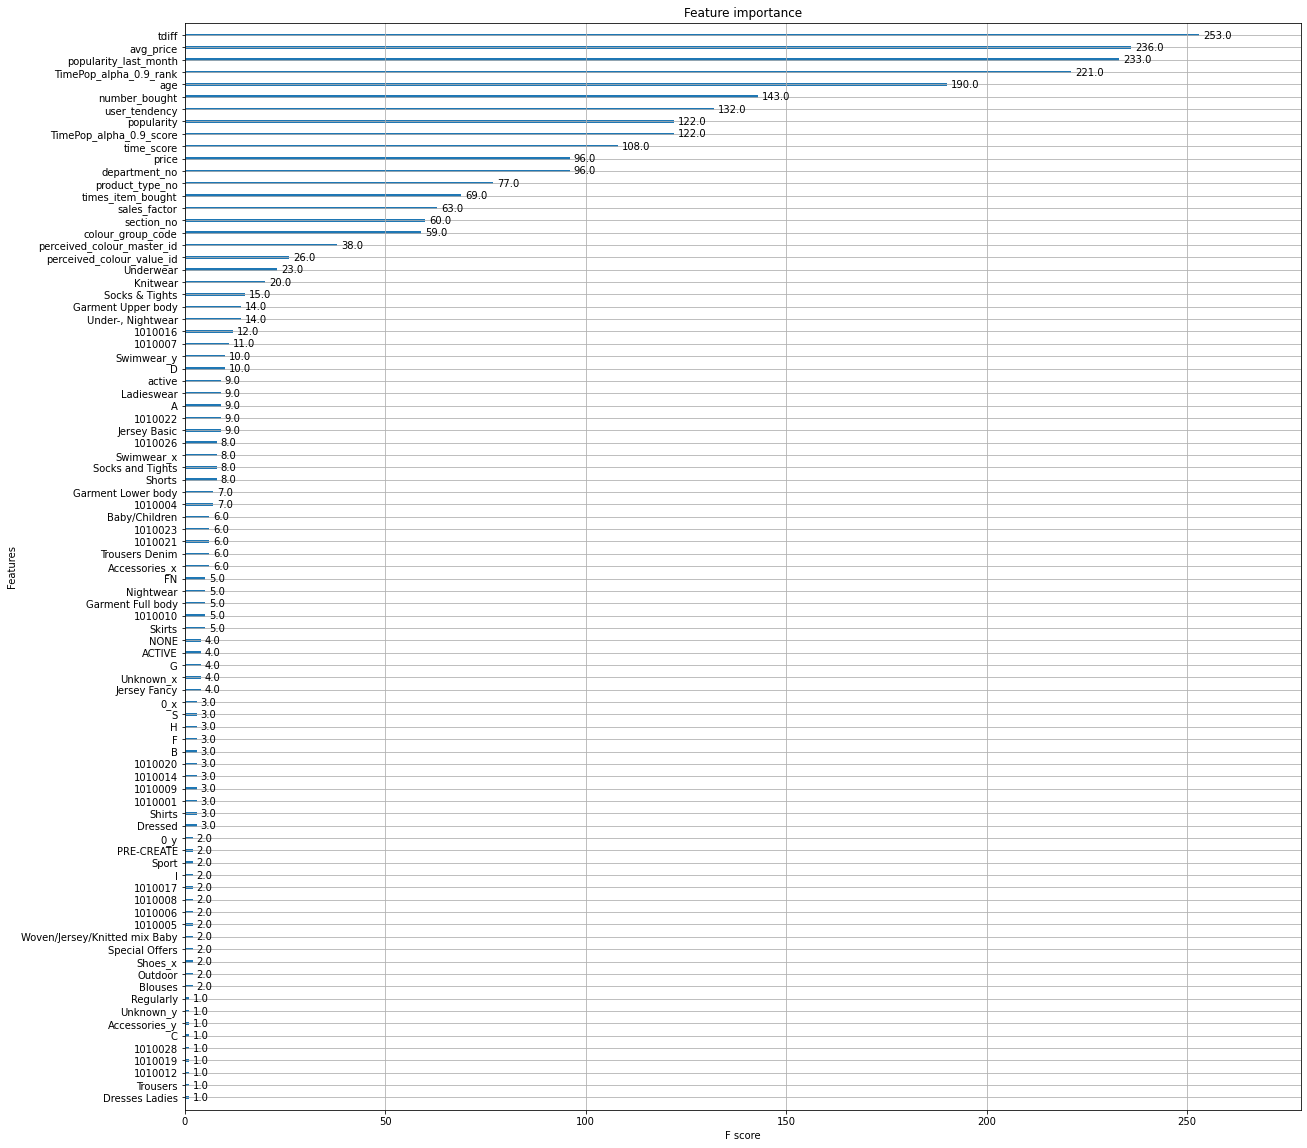

In [42]:
fig, ax = plt.subplots(figsize=(20, 20))
plot_importance(model, ax=ax)
plt.show()

In [8]:
model.best_ntree_limit

157

In [9]:
features = pd.read_feather(dr.get_preprocessed_data_path()/ f"dataset_dfs/full/{DATASET}")

# Remember to use the bert_ntree_limit when taking the predictions

In [10]:
features.head()

,customer_id,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,EASE_tw_False_rs_False_l2_0.001_score,EASE_tw_False_rs_False_l2_0.001_rank,article_id,rank,colour_group_code,department_no,popularity,...,section_no,price,sales_factor,active,age,avg_price,user_tendency,time_score,tdiff,times_item_bought
0,0,0.010266,1.0,100.297249,4.0,1482.0,0,71,1747,9558.0,...,53,0.033881,0.000000,0.0,22.0,0.027085,0.214286,1.0,0.006211,1.0
1,0,NaN,NaN,0.033527,97.0,135.0,1,9,3611,7993.0,...,62,0.013542,0.000000,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
2,0,NaN,NaN,0.033296,99.0,13213.0,2,31,3090,394.0,...,15,0.013542,0.733578,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
3,0,NaN,NaN,0.137206,18.0,263.0,3,12,3710,382.0,...,61,0.030492,0.100050,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
4,0,NaN,NaN,0.124191,20.0,710.0,4,9,3710,327.0,...,61,0.022017,0.480192,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN


In [11]:
customer_article_df = features[[DEFAULT_USER_COL, DEFAULT_ITEM_COL]].copy()
X = features.drop([DEFAULT_USER_COL, DEFAULT_ITEM_COL], axis=1)

In [12]:
X.head()

,ItemKNN_tw_True_rs_False_score,ItemKNN_tw_True_rs_False_rank,EASE_tw_False_rs_False_l2_0.001_score,EASE_tw_False_rs_False_l2_0.001_rank,rank,colour_group_code,department_no,popularity,popularity_last_month,number_bought,...,section_no,price,sales_factor,active,age,avg_price,user_tendency,time_score,tdiff,times_item_bought
0,0.010266,1.0,100.297249,4.0,0,71,1747,9558.0,93.0,25485,...,53,0.033881,0.000000,0.0,22.0,0.027085,0.214286,1.0,0.006211,1.0
1,NaN,NaN,0.033527,97.0,1,9,3611,7993.0,156.0,9873,...,62,0.013542,0.000000,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
2,NaN,NaN,0.033296,99.0,2,31,3090,394.0,9.0,1122,...,15,0.013542,0.733578,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
3,NaN,NaN,0.137206,18.0,3,12,3710,382.0,1.0,2250,...,61,0.030492,0.100050,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN
4,NaN,NaN,0.124191,20.0,4,9,3710,327.0,NaN,1585,...,61,0.022017,0.480192,0.0,22.0,0.027085,0.214286,NaN,NaN,NaN


In [13]:
y_pred = model.predict(X, ntree_limit=model.best_ntree_limit)

/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/core.py:105: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(
/raid/home/edoardo/GitProjects/HnMChallenge/.venv/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [14]:
customer_article_df["predicted_score"] = y_pred

In [15]:
customer_article_df

,customer_id,article_id,predicted_score
0,0,1482.0,1.509844
1,0,135.0,-0.594380
2,0,13213.0,-1.818791
3,0,263.0,-1.406393
4,0,710.0,-3.091531
...,...,...,...
170739467,1136205,20285.0,-0.521899
170739468,1136205,1330.0,-0.324962
170739469,1136205,1793.0,0.096729
170739470,1136205,8347.0,0.747960


In [16]:
sorted_scores = customer_article_df.sort_values([DEFAULT_USER_COL, "predicted_score"], ascending=[True, False])

In [17]:
sorted_scores

,customer_id,article_id,predicted_score
134,0,1638.0,2.093839
133,0,1797.0,1.878828
103,0,4861.0,1.709020
0,0,1482.0,1.509844
86,0,171.0,1.468524
...,...,...,...
170739353,1136205,553.0,-3.782434
170739363,1136205,411.0,-3.829042
170739329,1136205,3524.0,-3.929641
170739316,1136205,3099.0,-3.939692


In [18]:
sorted_scores_index = sorted_scores.reset_index(drop=True)

In [19]:
cutoff = sorted_scores_index.groupby(DEFAULT_USER_COL).size().values
i=0 
filter_indices = []
for cut in cutoff:
    filter_indices.extend(range(i, i+12))
    i=i+cut

In [20]:
cutoff.mean()

150.271581033721

In [21]:
final_df = sorted_scores_index.loc[filter_indices]

In [22]:
final_df

,customer_id,article_id,predicted_score
0,0,1638.0,2.093839
1,0,1797.0,1.878828
2,0,4861.0,1.709020
3,0,1482.0,1.509844
4,0,171.0,1.468524
...,...,...,...
170739318,1136205,10101.0,0.764370
170739319,1136205,8347.0,0.747960
170739320,1136205,2609.0,0.735057
170739321,1136205,11796.0,0.719393


In [23]:
final_final_df = final_df.drop("predicted_score", axis=1)

In [24]:
from hnmchallenge.submission_handler import SubmissionHandler
sh = SubmissionHandler()                                               

In [25]:
sh.create_submission_filtered_data([final_final_df], sub_name="xgb_ens3")